In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn
import os
from sklearn import linear_model
import seaborn as sns


# Test Run of OLS regression

The MSE for the prediciton is:
0.011685552653086635 

The R2 for the prediciton is:
0.8734702286246989 



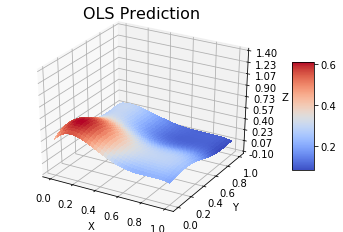

In [2]:
# Initializing the data
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction', (-0.10, 1.40))

## RIDGE bootstrapping

In [4]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)


# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))



for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


### Heatmaps of error-bias-variance for Ridge Bootstrapping on the Franke Function

Text(0.5, 15.0, '$\\lambda$')

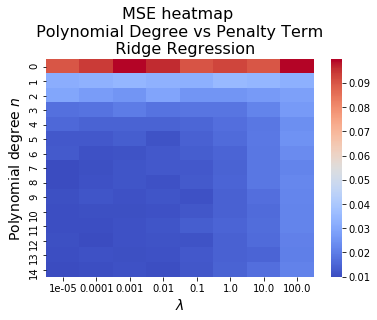

In [6]:
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

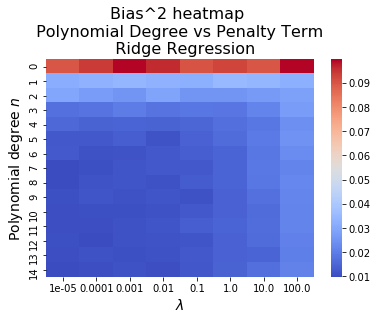

In [7]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

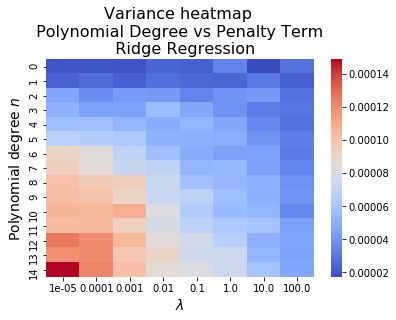

In [8]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)